<a href="https://colab.research.google.com/github/kiplangat-david/DSC12/blob/main/DSCIPWK4_KIPLANGAT_DAVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytic Question

Is the mean of Blue Cars taken in the city of Paris(postal codes beginning with 75) equals the mean Blue cars taken in the city of Essonne(postal codes beginning with 91) during the weekends?        

# Hypothesis Statement

Null Hypothesis: the mean of Blue Cars taken in paris equals the mean of Blue Cars taken in Essonne during the Weekends.

Ho : μ1 = μ2

Alternate Hypothesis: the mean of Blue Cars taken in Paris is not equal to the mean of Blue Cars taken in Essonne during the Weekends

Ha : μ1 ≠ μ2


# Metric for Success

This project will be considered a success when we are able to perform the following tasks:

(a) Define the null and alternate hypothesis.

(b) Clean data

(c) perform exploratory data analysis

(c) Perform hypothesis testing and interpret the results.

(d) Provide project summary and conclusions.

# Understanding the Research Context

Autolib was an electric car sharing service company in France that was operational between 2011 and 2018. The company had three types of electric cars i.e blue cars, Utilib cars and Utilib 1.4 cars. Blue cars were most popularly used. These cars were available across various cities and postal codes in France and renters could pick up cars in one station then drop them off at a different station that was closer to their destination. The dataset used in this analysis allows us to understand various elecric car usage patterns for the company. The available data contains usage information for various postal codes between January 2018 and June 2018.

For this project, I decided to focus on two cities Paris (department # 75) and Essonne (department # 91). Usage rates are generally higher during the weekends therefore the analysis will focus on this time period.

# Experimental Design
Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:

Load data and preview preliminary characteristics of the dataset
Data cleaning (check for and deal with outliers, anomalies and missing data)
Specify the null and alternate hypotheses
Specify the sampling technique
Perform univariate and bivariate analysis
Perform hypothesis testing
Discuss the hypothesis test results
Provide project summary and conclusion


# Data Relevance
The dataset used in the analysis contains records of electric car usage in France from January 2018 to June 2018. This dataset was originally sourced kaggle. Some of the information in the dataset includes postal code, day of the week and total cars returned or picked up for blue cars, Utilib cars and Utilib 1.4 cars.The data available for this analysis is valid and useful towards achieving the project goal given the availability of both numeric and categorical attributes.

# **Reading Data**

In [1]:
#import python relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

# Check Data

In [3]:
#preview top five records
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
#preview bottom records
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
#preview random sample
df.sample(n=7)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5906,92190,6/1/2018,1440,4,weekday,64,58,4,2,6,5,0,0
4637,92100,4/29/2018,1440,6,weekend,312,313,11,11,33,31,13,13
9661,92700,1/7/2018,1440,6,weekend,115,121,8,10,2,4,0,0
2191,75015,1/8/2018,1438,0,weekday,694,728,22,22,50,52,200,209
1142,75008,2/20/2018,1425,1,weekday,414,399,5,5,25,24,126,126
15839,95870,3/11/2018,1440,6,weekend,15,17,0,0,0,0,0,0
13140,94100,1/18/2018,1439,3,weekday,4,3,1,1,0,0,0,0


In [6]:
#number of rows and columns
df.shape

(16085, 13)

dataset has 16085 rows and 13 columns

In [7]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


**# Data Cleaning**

In [8]:
#check missing values
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

The data has no missing values

In [9]:
#check for duplicates
df.duplicated().any()

False

There are no duplicates in our data

In [10]:
#drop columns
# Since we are interested in learning more about blue cars only
# we can drop all other unnecessary columns

df = df.drop(df.columns[6:], axis=1)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum
0,75001,1/1/2018,1440,0,weekday,110
1,75001,1/2/2018,1438,1,weekday,98
2,75001,1/3/2018,1439,2,weekday,138
3,75001,1/4/2018,1320,3,weekday,104
4,75001,1/5/2018,1440,4,weekday,114


In [11]:
#renaming columns
df.columns = ['postal_code','date','daily_data_points','day_of_week','day_type','blue_cars_taken']
df.head()

,postal_code,date,daily_data_points,day_of_week,day_type,blue_cars_taken
0,75001,1/1/2018,1440,0,weekday,110
1,75001,1/2/2018,1438,1,weekday,98
2,75001,1/3/2018,1439,2,weekday,138
3,75001,1/4/2018,1320,3,weekday,104
4,75001,1/5/2018,1440,4,weekday,114


In [12]:
# Change Date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [13]:
# Creating a new 'month' attribute

df['month'] = df['date'].dt.month

In [14]:
encode = {"day_of_week" : {0:"monday", 1:"tuesday", 2:"wednesday", 3:"thursday",
                           4:"friday", 5:"saturday", 6:"sunday"}, "month" : {1:"January",
                          2:"February", 3:"March", 4:"April", 5:"May", 6:"June"}}

In [15]:
df.replace(encode, inplace = True)
df.head()

,postal_code,date,daily_data_points,day_of_week,day_type,blue_cars_taken,month
0,75001,2018-01-01,1440,monday,weekday,110,January
1,75001,2018-01-02,1438,tuesday,weekday,98,January
2,75001,2018-01-03,1439,wednesday,weekday,138,January
3,75001,2018-01-04,1320,thursday,weekday,104,January
4,75001,2018-01-05,1440,friday,weekday,114,January


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Blue Cars Taken')

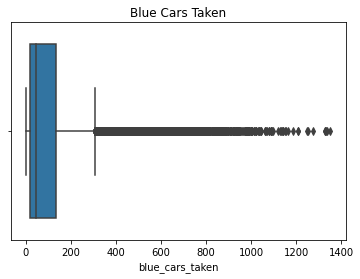

In [16]:
#check for outliers

# Checking for Outliers


sns.boxplot(df['blue_cars_taken'])
plt.title('Blue Cars Taken')


There are several 'outliers' in the dataset for the number of blue cars taken . However, there is no sufficient evidence that point to the likelihhod of these outliers being erroneous records. Since the outliers could be valid observations, we will not delete them.

In [17]:
#ANOMALIES
#bluecars taken
q1 = df.blue_cars_taken.quantile(0.25)
q3 = df.blue_cars_taken.quantile(0.75)
iqr = q3-q1

#printing to check points outside 50% of the records
print('iqr_taken =',iqr)


iqr_taken = 115.0


The results show that the blue cars taken have 115 records that are not within the middle 50% of the records in those columns.

In [18]:
#checking unique postal codes
df.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

Postal codes in France are organized by departments (which can also be described as cities). For instance, all postal codes for Paris begin with the number 75. To compress the dataset, we can group various Paris postal codes into one since they represent a similar geographical location i.e. city of Paris. We can do this for all other postal codes. As mentioned earlier, this analysis will focus on comparing the weekend blue car usage rates for Paris and Essonne

In [19]:
# Coding all postal codes with the city they represent

# create a list of our postal codes
postal_codes = [
    (df['postal_code'] >= 75000) & (df['postal_code'] <= 75999),
    (df['postal_code'] >= 78000) & (df['postal_code'] <= 78999),
    (df['postal_code'] >= 91000) & (df['postal_code'] <= 91999),
    (df['postal_code'] >= 92000) & (df['postal_code'] <= 92999),
    (df['postal_code'] >= 93000) & (df['postal_code'] <= 93999),
    (df['postal_code'] >= 94000) & (df['postal_code'] <= 94999),
    (df['postal_code'] >= 95000) & (df['postal_code'] <= 95999),
    ]

# create a list of the cities we want to assign for each postal code
city = ['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine', 'Seine-Saint_Denis', 'Val-de-Marne', 'Val-dOise']

# create a new column and use np.select to assign values to it using our lists as arguments
df['city'] = np.select(postal_codes, city)

# display updated DataFrame
df.head()

,postal_code,date,daily_data_points,day_of_week,day_type,blue_cars_taken,month,city
0,75001,2018-01-01,1440,monday,weekday,110,January,Paris
1,75001,2018-01-02,1438,tuesday,weekday,98,January,Paris
2,75001,2018-01-03,1439,wednesday,weekday,138,January,Paris
3,75001,2018-01-04,1320,thursday,weekday,104,January,Paris
4,75001,2018-01-05,1440,friday,weekday,114,January,Paris


In [20]:
# Creating a new dataframe with only Paris and Essonne
# and only weekend records which is the target records

df1 = df.loc[df['city'].isin(['Paris','Essonne']) & df['day_type'].isin(['weekend'])]
df1.head()

,postal_code,date,daily_data_points,day_of_week,day_type,blue_cars_taken,month,city
5,75001,2018-01-06,1437,saturday,weekend,187,January,Paris
6,75001,2018-01-07,1440,sunday,weekend,180,January,Paris
12,75001,2018-01-13,1440,saturday,weekend,224,January,Paris
13,75001,2018-01-14,1440,sunday,weekend,193,January,Paris
19,75001,2018-01-20,1439,saturday,weekend,217,January,Paris


In [21]:
#general info of cleaned data
df1.describe()

,postal_code,daily_data_points,blue_cars_taken
count,1100.000000,1100.000000,1100.000000
mean,76981.520000,1434.636364,414.728182
std,5314.568867,20.884764,302.349489
min,75001.000000,1318.000000,0.000000
25%,75007.000000,1440.000000,185.750000
50%,75013.000000,1440.000000,387.500000
75%,75019.000000,1440.000000,624.250000
max,91400.000000,1440.000000,1352.000000


In [22]:
#Bluecars usage per city over the weekends

df1.city.value_counts()

Paris      968
Essonne    132
Name: city, dtype: int64

Paris was much busy compared to Essonne

# Exploratory Data Analysis

# *(a) Univariate Analysis*

In [23]:
#MEASURES OF CENTRAL TENDENCY
#max pickings
max = df1.blue_cars_taken.max()
print('max pickked =',max)

#min pickings
min = df1.blue_cars_taken.min()
print('min pickings =',min)

#range of pickings
range = max-min
print('range =',range)

#mean
mean = df1.blue_cars_taken.mean()
print('mean =',mean)

#mode
mode = df1.blue_cars_taken.mode()
print('mode =',mode)

#median
median = df1.blue_cars_taken.median()
print('median =',median)

max pickked = 1352
min pickings = 0
range = 1352
mean = 414.72818181818184
mode = 0    11
dtype: int64
median = 387.5


In [24]:
#measures of dispersion
#variance
var = df1.blue_cars_taken.var()
print('variance =',var)

#standard deviation
std = df1.blue_cars_taken.std()
print('std =',std)

#skewness
skew = df1.blue_cars_taken.skew()
print('skewness =',skew)

#kurtosis
kurt  = df1.blue_cars_taken.kurt()
print('kurtosis =',kurt)

variance = 91415.21358176853
std = 302.3494891376014
skewness = 0.42349707941584214
kurtosis = -0.3436469147118073


from the skewness result(0.42349707941584214) above, it shows that data is slightly right skewed

In [25]:
#frequency table
df1.blue_cars_taken.value_counts()

11      18
13      16
9       16
12      15
14      14
        ..
525      1
526      1
528      1
530      1
1352     1
Name: blue_cars_taken, Length: 592, dtype: int64

In [26]:
#check how weekends looked like
df1.day_of_week.value_counts()

sunday      550
saturday    550
Name: day_of_week, dtype: int64

weekends were equally busy

Text(0.5, 1.0, 'Distribution per Month')

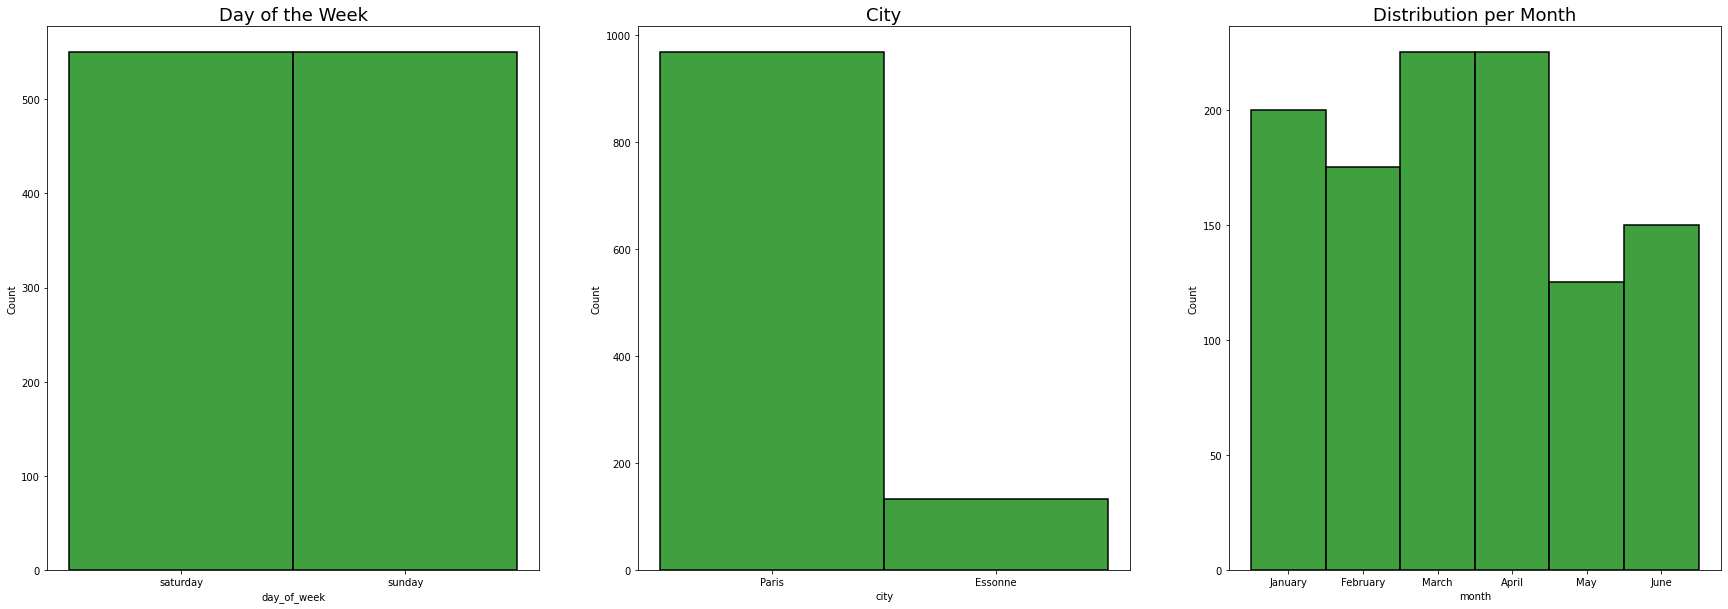

In [27]:
#visualizations of distributions of day of the week
#mont and
#cities
fig,ax=plt.subplots(1,3,figsize=(30,10))
custom_palette = ["green"]
sns.set_context('talk')
sns.set_palette(custom_palette)
sns.histplot(df1['day_of_week'],ax=ax[0])
ax[0].set_title('Day of the Week')
sns.histplot(df1['city'],ax=ax[1])
ax[1].set_title('City')
sns.histplot(df1['month'],ax=ax[2])
ax[2].set_title('Distribution per Month')


insights

(a) Equal distributions on saturdays and sundays

(b) more distributions in the city of paris compared to  the city of Enssonne

(c)most pickings were done in the months of March and April and least in the month of may

Text(0.5, 1.0, 'Distributions of bluecars taken')

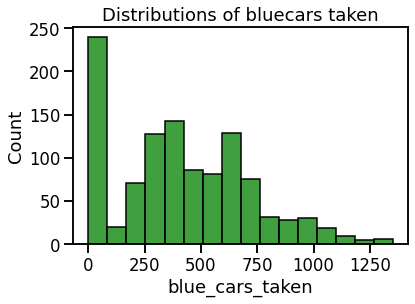

In [28]:
sns.histplot(df1['blue_cars_taken'])
plt.title('Distributions of bluecars taken')

The distributions were not normally distributed because of different usage rates in the two cities

# *(b) Bivariate Analysis*

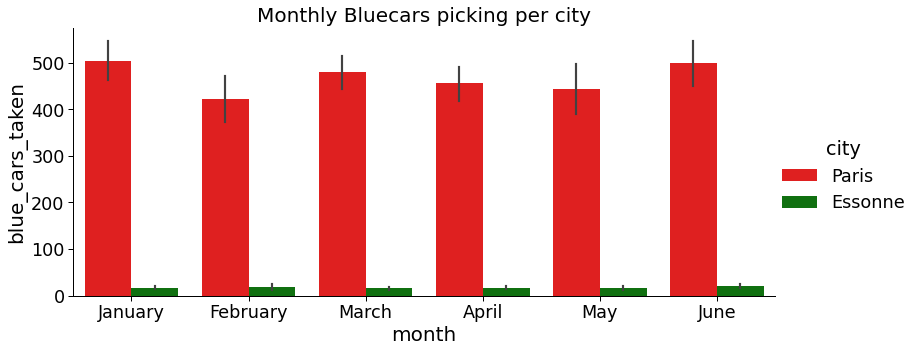

In [29]:
#catplot showiing monthly bluecars picking per city  
custom_palette = ['red','green']   
sns.set_palette(custom_palette)
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 20,"axes.labelsize": 20,'figure.figsize':20}) 
sns.catplot(kind = 'bar', data = df1, y = 'blue_cars_taken', x = 'month',hue='city',aspect=18.7/8.27)         
plt.title('Monthly Bluecars picking per city')
plt.show()

More bluecars are picked in the city of Paris compared to the city of Essonne

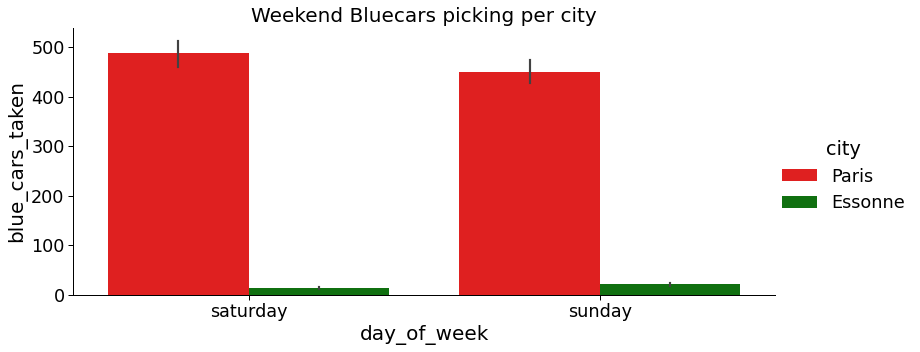

In [30]:
#catplot showing weekend bluecars picking per city  
custom_palette = ['red','green']   
sns.set_palette(custom_palette)
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 20,"axes.labelsize": 20,'figure.figsize':20}) 
sns.catplot(kind = 'bar', data = df1, y = 'blue_cars_taken', x = 'day_of_week',hue='city',aspect=18.7/8.27)         
plt.title('Weekend Bluecars picking per city')
plt.show()

The rate of picking bluecars is higher in saturdays than in sundays. This also happens most in Paris than in Essonne

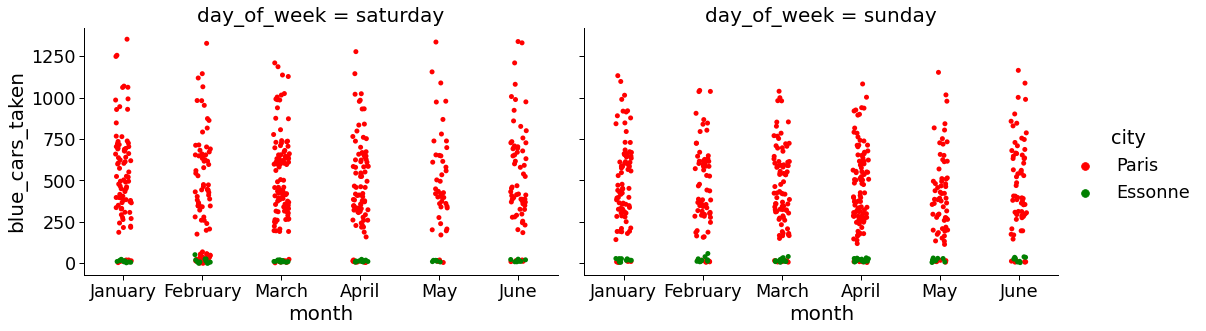

In [31]:
#catplot showing number of bluecars picked in every weekend
#of the month per city
sns.catplot(x="month", y="blue_cars_taken", hue="city",
                col="day_of_week", data=df1,aspect=18.7/12.27)
custom_palette = ["red","green"]

sns.set_palette(custom_palette)


Distributions shows that saturdays were more busy compared with sundays with far much higher rates of bluecar picking in Paris than in Essonne

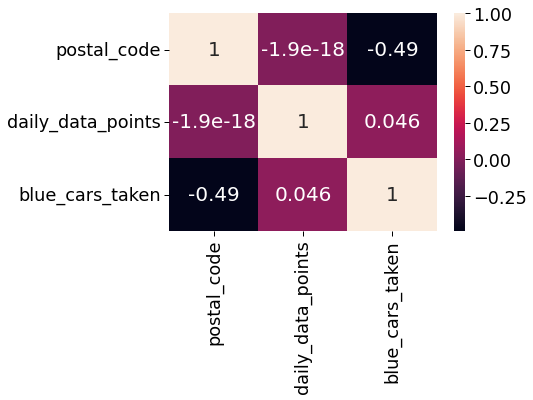

In [32]:
# Plotting the Pearson correlation
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Sampling Approach

We will use stratified random samplinng because we are compparing samples of bluecars usage in two different cities, Paris and Enssenne. City column is our strata in this case.. Pick up and drop off stations are unique to postal codes/city. A pick up station can only exists in one postal code or city. Therefore, a car pick up or drop off recorded in a particular station belongs to a unique city. Using only one strata ensures that each record of usage has an equal chance of being selected during sampling. Each stratum has no overlapping sample therefore no bias in the sampling technique.

In addition, the sample chosen needs to reflect the structure of the target dataset. Our selected sample should reflect this distribution to ensure that it is as representative to the entire target population as possible. To execute the sampling, we would split the target population into the two stratum and order each record from 1 to N for both Paris and Enssenne stratum. We need the sample size of each strata to be proportionate to the target population size of that particular strata.

In [33]:
# Stratified sample
# We will choose a sample size of 10% of all target records

sample = df1.groupby('city', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
sample.head()

,postal_code,date,daily_data_points,day_of_week,day_type,blue_cars_taken,month,city
3904,91330,2018-01-06,1437,saturday,weekend,6,January,Essonne
4156,91370,2018-04-15,1439,sunday,weekend,27,April,Essonne
4141,91370,2018-03-31,1440,saturday,weekend,10,March,Essonne
4102,91370,2018-02-17,1440,saturday,weekend,26,February,Essonne
4000,91330,2018-04-15,1439,sunday,weekend,33,April,Essonne


In [34]:
# proportion of the stratified sample
sample.city.value_counts()

Paris      97
Essonne    13
Name: city, dtype: int64

The sample represents 10% of the population and follows the correct proportion

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


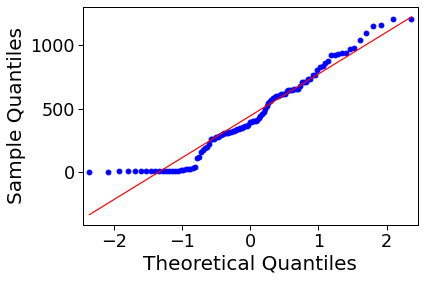

In [35]:

# Performing normality test on the sample selected

from statsmodels.graphics.gofplots import qqplot

# q-q plot

qqplot(sample['blue_cars_taken'], line='s')
plt.show()

The data is slightly right skewed since the dataset contained a lot of outliers.

This will not affect our hypothesis testing that much since we have a relatively large sample size to work with (n=110 which is much higher than 30).

**# Hypothesis Testing**

To conduct hypothesis testing, we will use a two sample z-test and p-value to either reject or accept the null hypothesis.

Below are the reasons why we choose to use the z-test as the appropriate test statistic:

The sample size is greater than 30.

Data points are independent from each other.

The sample data has been randomly selected from a population, so each item has an equal chance of being selected.

In [36]:
# First we need to define the two samples separately

paris = sample[(sample['city'] == 'Paris')]
essonne = sample[(sample['city'] == 'Essonne')]

print(paris)
print(essonne)

      postal_code       date  ...     month   city
2316        75015 2018-05-27  ...       May  Paris
2855        75019 2018-02-17  ...  February  Paris
3273        75112 2018-06-17  ...      June  Paris
359         75003 2018-02-17  ...  February  Paris
2440        75016 2018-04-14  ...     April  Paris
...           ...        ...  ...       ...    ...
1483        75010 2018-03-24  ...     March  Paris
2516        75017 2018-01-21  ...   January  Paris
125         75001 2018-05-20  ...       May  Paris
607         75004 2018-06-03  ...      June  Paris
2256        75015 2018-03-17  ...     March  Paris

[97 rows x 8 columns]
      postal_code       date  ...     month     city
3904        91330 2018-01-06  ...   January  Essonne
4156        91370 2018-04-15  ...     April  Essonne
4141        91370 2018-03-31  ...     March  Essonne
4102        91370 2018-02-17  ...  February  Essonne
4000        91330 2018-04-15  ...     April  Essonne
4170        91370 2018-04-29  ...     April  Es


# Significance Level
The level of significance of a test is the probability of rejecting the null hypothesis when it is true. For this analysis, the significance level chosen is 0.05 or 5% .

Because our hypothesis is two tailed, we will divide the significance level by 2 to get 0.025.
If the p-value calculated from the test statistic is less than 0.025 then we reject the null hypothesis. If the value is greater than or equal to 0.025 then we accept the null hypothesis.

In [37]:
#calculating zscore and p_value
from statsmodels.stats.weightstats import ztest as ztest
ztest(paris['blue_cars_taken'],essonne['blue_cars_taken'],value=0)

(5.654567558636612, 1.562391358545325e-08)

from the test above, our p_value(4.16581327576743e-09) is far less than the significance level(0.025) hence we reject the null hypothesis in favor of alternate hypothesis.
The difference between bluecars picked in the city of paris and the blue cars picked in the city of Essonne is statistically significant



# Power of the test

In [38]:
#first compute effect size
x = paris.blue_cars_taken.mean()
y = essonne.blue_cars_taken.mean()
z = x-y

In [39]:

# Checking the power of the two sample z test

from statsmodels.stats.power import zt_ind_solve_power

alpha=0.05
ratio=(97/13)
effect_size= z

statistical_power = zt_ind_solve_power(effect_size=effect_size, nobs1=97, alpha=alpha, power=None, ratio=ratio, alternative='two-sided')
print("The statistical power is: {0}".format(statistical_power))

The statistical power is: 1.0


The power of the test is 100% hence it is significant we reject null hypothesis

# Hypothesis Testing Interpretation

After calculation the p value of the two sample z test was found to be          4.16581327576743e-09 which is far much less than the significance level(0.025). Therefore, we reject the null hypothesis in favor of alternate hypothesis. This means that the average number of blue cars picked up on weekends is not the same for Paris and that for Essonne. In this case, we accept the alternate hypothesis.

The calculated z statistic is 5.877471134260214 against the expected critical value of 1.960. This means that the data points are 5.877471134260214 standard deviations away from the mean. This is further evidence that we need to reject the null hypothesis.

# Project Summary and Conclusions

We have successfully defined the null and alternate hypothesis, executed the sampling technique and carried out hypothesis testing which led to the rejection of the null hypothesis. We concluded that the average number of blue cars picked up in Paris is not the same as that in Enssonne.

Further investigations need to be carried out to know which causes large gap between bluecars picking in the cities of Paris and Enssonne.

In [40]:
#interpretation of test statistics results
#project summary and conclusions